[IPython Notebook](ecc.ipynb) |  [Python Script](ecc.py)

Eccentricity (Volume Conservation)
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Relevant Parameters
----------------------------


In [3]:
print b.get(qualifier='ecc')

Parameter: ecc@binary@component
                       Qualifier: ecc
                     Description: Eccentricity
                           Value: 0.0
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component, requiv_max@primary@component, requiv_max@secondary@component
                      Related to: t0_supconj@binary@component, period@binary@component, per0@binary@component, t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component, q@binary@component, syncpar@primary@component, sma@binary@component, incl@primary@component, long_an@primary@component, incl@binary@component, long_an@binary@component, requiv_max@primary@component, syncpar@secondary@component, incl@secondary@component, long_an@secondary@component, requiv_max@secondary@component



In [4]:
print b.get(qualifier='ecosw', context='component')

Parameter: ecosw@binary@component
                       Qualifier: ecosw
                     Description: Eccentricity times cos of argument of periastron
                           Value: 0.0
                  Constrained by: ecc@binary@component, per0@binary@component
                      Constrains: None
                      Related to: ecc@binary@component, per0@binary@component



In [5]:
print b.get(qualifier='esinw', context='component')

Parameter: esinw@binary@component
                       Qualifier: esinw
                     Description: Eccentricity times sin of argument of periastron
                           Value: 0.0
                  Constrained by: ecc@binary@component, per0@binary@component
                      Constrains: None
                      Related to: ecc@binary@component, per0@binary@component



Relevant Constraints
-----------------------------

In [6]:
print b.get(qualifier='ecosw', context='constraint')

Constrains (qualifier): ecosw
Expression in SI (value): {ecc@binary@component} * (cos({per0@binary@component}))
Current Result (result): 0.0


In [7]:
print b.get(qualifier='esinw', context='constraint')

Constrains (qualifier): esinw
Expression in SI (value): {ecc@binary@component} * (sin({per0@binary@component}))
Current Result (result): 0.0


Influence on Meshes (volume conservation)
----------------------------


In [8]:
b.add_dataset('mesh', times=np.linspace(0,1,11), columns=['volume'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [9]:
b.set_value('ecc', 0.2)

In [10]:
b.run_compute()

<ParameterSet: 68 parameters | components: primary, secondary>

In [11]:
print b['volume@primary@model']

ParameterSet: 11 parameters
  00.000000@volume@primary@la...: 4.18879020479 solRad3
  00.100000@volume@primary@la...: 4.18879020479 solRad3
  00.200000@volume@primary@la...: 4.18879020479 solRad3
  00.300000@volume@primary@la...: 4.18879020479 solRad3
  00.400000@volume@primary@la...: 4.18879020479 solRad3
  00.500000@volume@primary@la...: 4.18879020479 solRad3
  00.600000@volume@primary@la...: 4.18879020479 solRad3
  00.700000@volume@primary@la...: 4.18879020479 solRad3
  00.800000@volume@primary@la...: 4.18879020479 solRad3
  00.900000@volume@primary@la...: 4.18879020479 solRad3
  01.000000@volume@primary@la...: 4.18879020479 solRad3


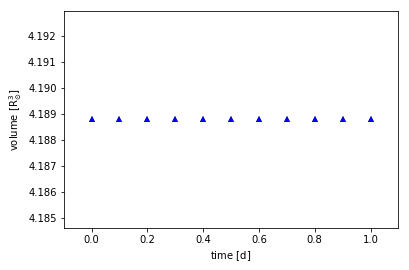

In [12]:
afig, mplfig = b['mesh01'].plot(x='times', y='volume', show=True)

In [13]:
b.remove_dataset('mesh01')

Influence on Radial Velocities
----------------------------------


In [14]:
b.add_dataset('rv', times=np.linspace(0,1,51))

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [15]:
b.run_compute()

<ParameterSet: 4 parameters | components: primary, secondary>

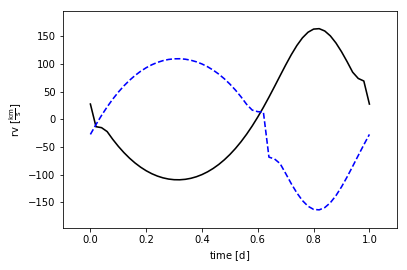

In [16]:
afig, mplfig = b['rv@model'].plot(show=True)

In [17]:
b.remove_dataset('rv01')

Influence on Light Curves (fluxes)
-----------------------------------------


In [18]:
b.add_dataset('lc', times=np.linspace(0,1,51))

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [19]:
b.run_compute()

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

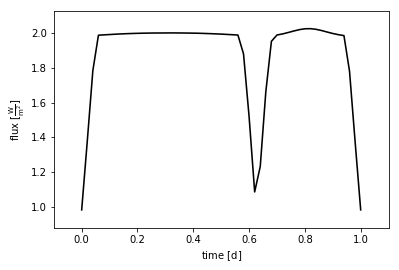

In [20]:
afig, mplfig = b['lc@model'].plot(show=True)